**Date Extraction**

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import os
sns.set_theme(style="whitegrid")

df = pd.read_csv(r'D:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\selected_dataset\DiaHealth A Bangladeshi Dataset for Type 2 Diabetes Prediction\Cleaned_Datasets\Diabetes_Final_Data_Cleaned_v4.csv')
df.head()

,age,gender,systolic_bp,diastolic_bp,glucose,bmi,hypertensive,diabetic
0,42,0,110,73,5.88,25.75,0,0
1,35,0,125,68,5.71,19.58,0,0
2,62,0,127,74,6.85,20.24,0,0
3,68,0,150,81,5.71,17.79,0,0
4,40,1,131,73,7.22,23.42,0,0


**Warning Compresser**

In [98]:
import warnings

# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')

print("Warnings suppressed!")

Warnings suppressed!


**Feature-target Correlation**

In [99]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.corr(), annot=True, cmap='magma', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix')
# plt.show()

We would like to drop some columns since they somehow have negative relationships with target.

In [100]:
# df = df.drop(['pulse_rate', 'family_diabetes', 'family_hypertension', 'stroke', 'cardiovascular_disease', 'gender', 'hypertensive'], axis=1)
# df = df.drop(['pulse_rate', 'family_diabetes', 'family_hypertension'], axis=1)
print(f'The remained columns are: {df.columns[:-1].tolist()}')

The remained columns are: ['age', 'gender', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi', 'hypertensive']


# **1. Model Construction (Pending)**

**Split Data**

In [101]:
# copy the original data
df_1 = df.copy()

# dimension excluve target
df_1.iloc[:, :-1].shape

(4730, 7)

For spliting data, we will split data into two sections known as `Train` and `Test` datasets. The prportion of split data is 70:30

In [102]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_1.drop('diabetic', axis=1)
y = df_1['diabetic']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Scaled!!")

Data Scaled!!


## **1.2. Initial Model Test**

We are going to build some models that operate without scaling the data.

**Functions**

First, we are gonna build some functions, such as `correlatio headmap`, `confusion metrix`, `classification report`, and `roc and auc` to see the model performance

In [103]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# plot heatmap for confustion metrix
def plot_correlation_heatmap(y_test, y_pred, name:str) -> None:
    confusion_matrix_report = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_matrix_report, annot=True, fmt=".0f", cmap="Reds", linewidth=.5)
    plt.title(f"Confusion Metrics for {name}", fontsize=15, fontweight='bold')
    plt.ylabel("Actual Classes")
    plt.xlabel("Predicted Classes")
    plt.show()

# function to print model performance report (for initial model evaluation)
def confusion_metrix_and_classification_report(model, X_train, X_test, y_train, y_test):
    '''### This model returns model specified along evaluaton metrics'''

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # plot confusion matrix
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # return the model
    return model


# function to plot ROC and AUC
def plot_roc_auc(model, X_test, y_test) -> None:
    # Get predicted probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Create ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve of {model.__class__.__name__}")
    plt.show()
    
    # Compute AUC
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC: {auc:.4f}")
    
print("Performance Functions Defined!!")

Performance Functions Defined!!


### **1.2.1. Models Unaffected by Scaling**

#### **1.2.1.1. Fresh Trained Models**

In [104]:
y_test.value_counts()

diabetic
0    916
1     30
Name: count, dtype: int64

##### **Decision Trees**

**Model and Evaluation**

In [105]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model and print the performance report
model_dt = confusion_metrix_and_classification_report(DecisionTreeClassifier(random_state=42), X_train, X_test, y_train, y_test)

Confusion Matrix:
[[877  39]
 [ 28   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       916
           1       0.05      0.07      0.06        30

    accuracy                           0.93       946
   macro avg       0.51      0.51      0.51       946
weighted avg       0.94      0.93      0.93       946



**Insepct the Feature Importance Rate**

In [106]:
# Create a DataFrame of features and their importance rates
def make_importance_df(model):
    feature_importances = pd.DataFrame({
        'Feature': model.feature_names_in_,
        'Importance': model.feature_importances_
    })
    
    # Sort the DataFrame by importance rates in descending order
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
    
    return feature_importances

In [107]:
print("Model Feature Importance Report:")
make_importance_df(model_dt)

Model Feature Importance Report:


,Feature,Importance
0,glucose,0.217496
1,bmi,0.208483
2,age,0.158055
3,diastolic_bp,0.147437
4,systolic_bp,0.141365
5,hypertensive,0.094630
6,gender,0.032534


**ROC and AUC**

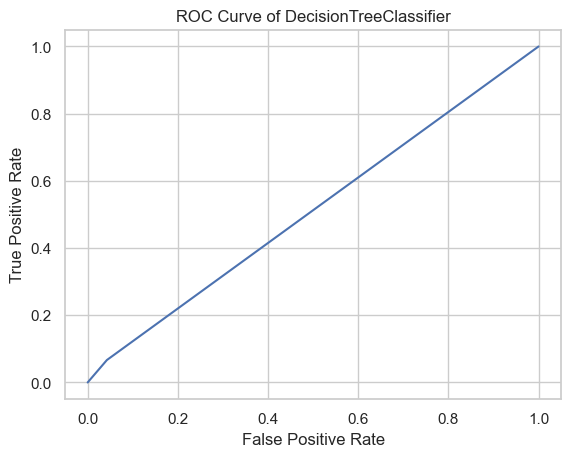

AUC: 0.5120


In [108]:
plot_roc_auc(model_dt, X_test, y_test)

##### **Random Forests**

In [109]:
from sklearn.ensemble import RandomForestClassifier

model_rf = confusion_metrix_and_classification_report(RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)

Confusion Matrix:
[[915   1]
 [ 30   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       916
           1       0.00      0.00      0.00        30

    accuracy                           0.97       946
   macro avg       0.48      0.50      0.49       946
weighted avg       0.94      0.97      0.95       946



**Inspect importance rates of features for `Random Forest` model**

In [110]:
print("Model Feature Importance Report:")
make_importance_df(model_rf)

Model Feature Importance Report:


,Feature,Importance
0,glucose,0.223645
1,bmi,0.211319
2,systolic_bp,0.158561
3,age,0.149902
4,diastolic_bp,0.145189
5,hypertensive,0.086331
6,gender,0.025052


**ROC and AUC**

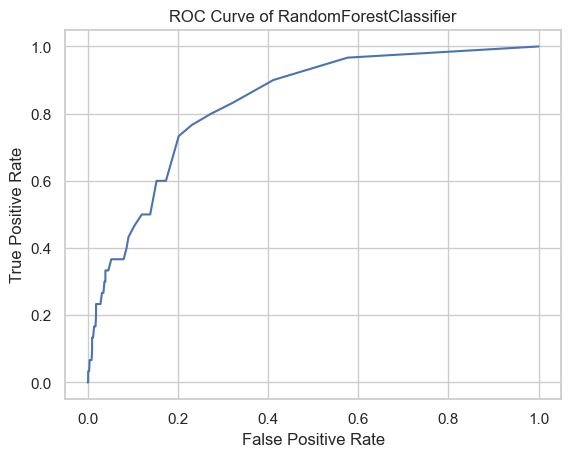

AUC: 0.8308


In [129]:
plot_roc_auc(model_rf, X_test, y_test)

##### **Naive Bayes**

In [130]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
model_gnb = confusion_metrix_and_classification_report(GaussianNB(), X_train, X_test, y_train, y_test)

Confusion Matrix:
[[844  72]
 [ 16  14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       916
           1       0.16      0.47      0.24        30

    accuracy                           0.91       946
   macro avg       0.57      0.69      0.60       946
weighted avg       0.96      0.91      0.93       946



**ROC and AUC**

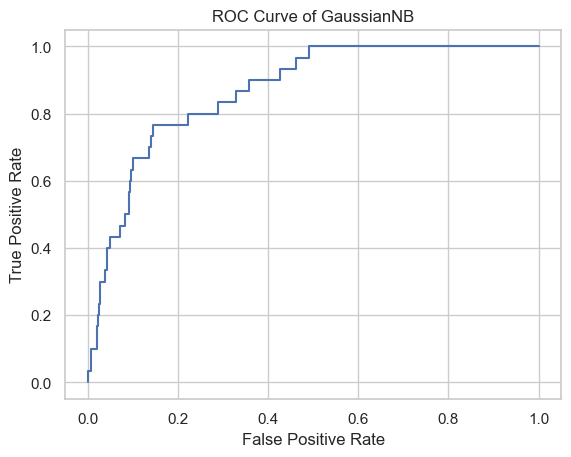

AUC: 0.8680


In [131]:
plot_roc_auc(model_gnb, X_test, y_test)

#### **Naive Bayes: BernoulliNB**

In [133]:
from sklearn.naive_bayes import BernoulliNB

# Create a Bernoulli Naive Bayes classifier
model_bnb = confusion_metrix_and_classification_report(BernoulliNB(), X_train, X_test, y_train, y_test)

Confusion Matrix:
[[916   0]
 [ 30   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       916
           1       0.00      0.00      0.00        30

    accuracy                           0.97       946
   macro avg       0.48      0.50      0.49       946
weighted avg       0.94      0.97      0.95       946



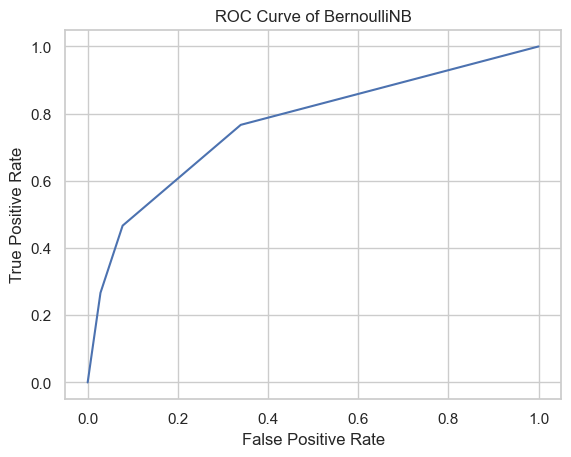

AUC: 0.7668


In [134]:
plot_roc_auc(model_bnb, X_test, y_test)

#### **Naive Bayes: Multinomial**

In [135]:
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
model_mnb = confusion_metrix_and_classification_report(MultinomialNB(), X_train, X_test, y_train, y_test)

Confusion Matrix:
[[916   0]
 [ 30   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       916
           1       0.00      0.00      0.00        30

    accuracy                           0.97       946
   macro avg       0.48      0.50      0.49       946
weighted avg       0.94      0.97      0.95       946



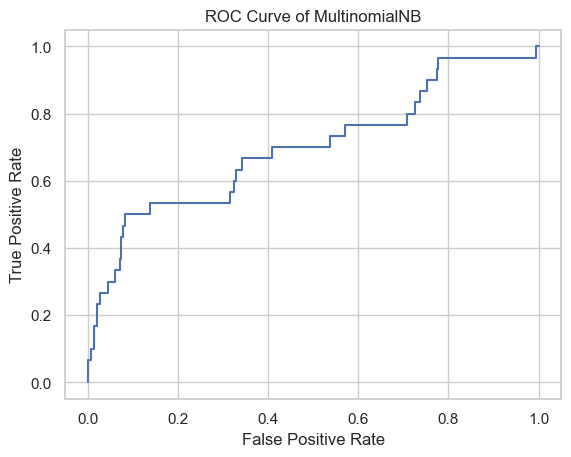

AUC: 0.6991


In [136]:
plot_roc_auc(model_mnb, X_test, y_test)

##### **Gradient Boosting Machines (GBM)**

In [137]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Regressor
model_gbr = confusion_metrix_and_classification_report(GradientBoostingClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)

Confusion Matrix:
[[907   9]
 [ 29   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       916
           1       0.10      0.03      0.05        30

    accuracy                           0.96       946
   macro avg       0.53      0.51      0.51       946
weighted avg       0.94      0.96      0.95       946



**ROC and AUC**

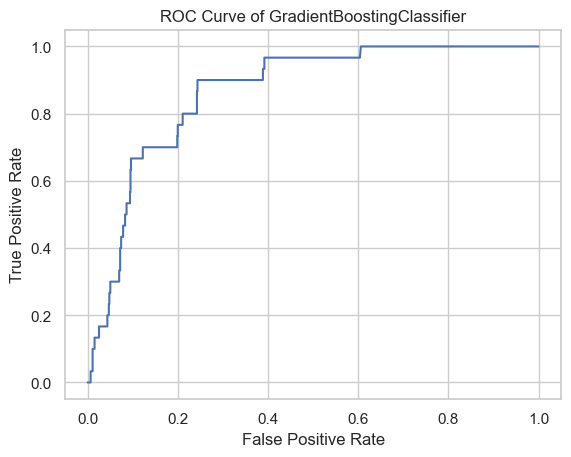

AUC: 0.8660


In [138]:
plot_roc_auc(model_gbr, X_test, y_test)

##### **Support Vector Machines (SVM) with Non-linear Kernels**

In [144]:
from sklearn.svm import SVC

# Create an SVM classifier with a non-linear kernel (e.g., 'rbf')
model_svm = confusion_metrix_and_classification_report(SVC(probability=True), X_train, X_test, y_train, y_test)

Confusion Matrix:
[[916   0]
 [ 30   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       916
           1       0.00      0.00      0.00        30

    accuracy                           0.97       946
   macro avg       0.48      0.50      0.49       946
weighted avg       0.94      0.97      0.95       946



**ROC and AUC**

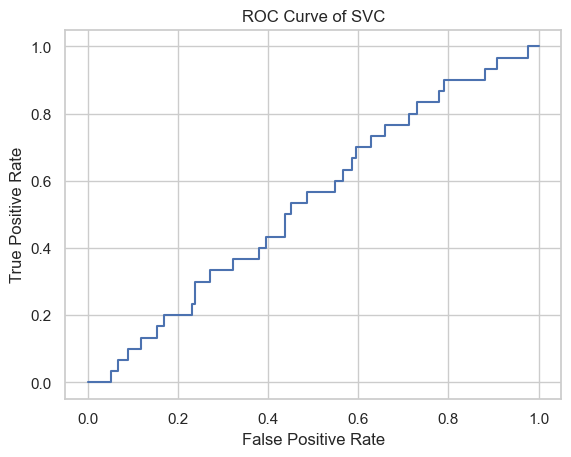

AUC: 0.5367


In [145]:
plot_roc_auc(model_svm, X_test, y_test)

#### **XGBoost**

In [146]:
from xgboost import XGBClassifier

# Create a CatBoost classifier
model_xgb = confusion_metrix_and_classification_report(XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss'), X_train, X_test, y_train, y_test)

Confusion Matrix:
[[911   5]
 [ 29   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       916
           1       0.17      0.03      0.06        30

    accuracy                           0.96       946
   macro avg       0.57      0.51      0.52       946
weighted avg       0.94      0.96      0.95       946



d:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:17:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [147]:
make_importance_df(model_xgb)

,Feature,Importance
0,hypertensive,0.696268
1,glucose,0.065426
2,diastolic_bp,0.055675
3,age,0.055664
4,gender,0.049080
5,bmi,0.045018
6,systolic_bp,0.032869


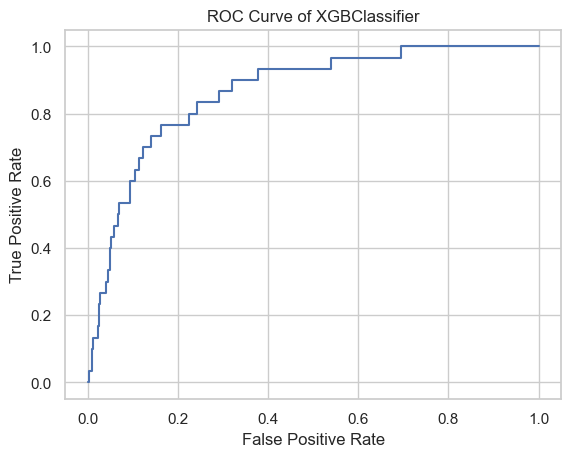

AUC: 0.8636


In [148]:
plot_roc_auc(model_xgb, X_test, y_test)

#### **LIGTHBoost**

In [149]:
from lightgbm import LGBMClassifier

# Create a LightGBM classifier
model_lgb = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='binary', random_state=42)

# Train the model and print the performance report
model_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 152, number of negative: 3632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 3784, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040169 -> initscore=-3.173658
[LightGBM] [Info] Start training from score -3.173658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier(max_depth=3, objective='binary', random_state=42)

In [150]:
# Make predictions on the test set
y_pred = model_lgb.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[912   4]
 [ 28   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       916
           1       0.33      0.07      0.11        30

    accuracy                           0.97       946
   macro avg       0.65      0.53      0.55       946
weighted avg       0.95      0.97      0.96       946



In [151]:
make_importance_df(model_lgb)

,Feature,Importance
0,glucose,206
1,diastolic_bp,110
2,bmi,105
3,age,97
4,systolic_bp,69
5,hypertensive,31
6,gender,14


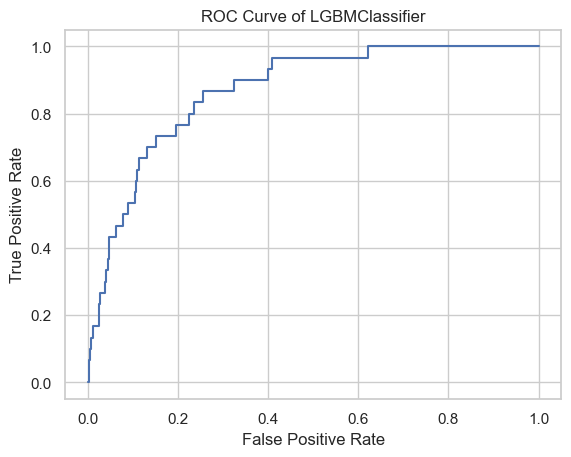

AUC: 0.8687


In [152]:
plot_roc_auc(model_lgb, X_test, y_test)

### **1.2.2. Models Affected by Scaling**